In [267]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [279]:
DATA_FILE = "data/fire_theft.xls"

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [269]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [270]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [271]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [272]:
loss_square = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [273]:
def huber_loss(labels, predictions, delta=1.0):
    res = tf.abs(predictions - labels)
    return tf.where(tf.less(res, delta), 0.5 * tf.square(res), delta * res - 0.5 * tf.square(delta))

In [259]:
#loss_huber = huber_loss(Y, Y_predicted)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [260]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(huber_loss(Y, Y_predicted, delta = .05))

In [261]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [262]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [263]:
for i in range(50): # train the model 50 epochs
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss_square], feed_dict={X:x, Y:y})
        total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close() 

Epoch 0: 1638.4929435593742
Epoch 1: 1609.5319445700873
Epoch 2: 1580.9323383172352
Epoch 3: 1552.6942826963607
Epoch 4: 1524.8175816280502
Epoch 5: 1497.3022700945537
Epoch 6: 1470.148410549077
Epoch 7: 1443.816837867101
Epoch 8: 1419.523480009465
Epoch 9: 1395.5349259376526
Epoch 10: 1371.8513117517743
Epoch 11: 1348.472394159862
Epoch 12: 1325.3983734221686
Epoch 13: 1302.629207611084
Epoch 14: 1280.16475940886
Epoch 15: 1258.0052525656563
Epoch 16: 1236.1504360834758
Epoch 17: 1214.600567863101
Epoch 18: 1193.3553888230097
Epoch 19: 1172.4151257106237
Epoch 20: 1151.779659180414
Epoch 21: 1131.4490302857898
Epoch 22: 1111.4232272193544
Epoch 23: 1091.7022864932105
Epoch 24: 1072.2861348106749
Epoch 25: 1053.174772716704
Epoch 26: 1034.3682302747454
Epoch 27: 1015.8664912269229
Epoch 28: 997.6696246919178
Epoch 29: 979.777490070888
Epoch 30: 962.1902720133463
Epoch 31: 944.9077779224941
Epoch 32: 927.9301531882513
Epoch 33: 911.2573250134786
Epoch 34: 894.8893537975493
Epoch 35: 878

Step 9: output the values of w and b

In [264]:
w, b = sess.run([w, b])

Step 10: plot the results

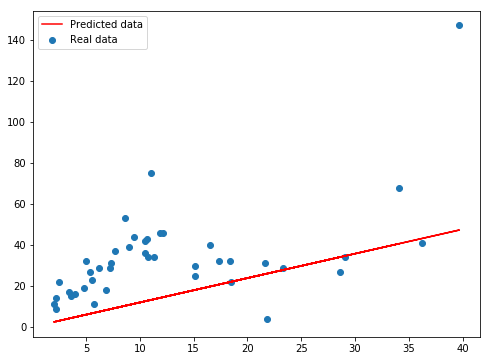

In [265]:
X, Y = data[:, 0], data[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="Real data")
plt.plot(X, w * X + b, label="Predicted data", color='r')
plt.legend()
plt.show()

# Try huber loss with different deltas:

In [276]:
delta = [.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5.]
loss_with_delta = []
for i in range(len(delta)):
    loss_with_delta.append(huber_loss(Y, Y_predicted, delta=delta[i]))

optimizer = []
for i in range(len(delta)):
    optimizer.append(tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss_with_delta[i]))
    
w_n = []
b_n = []
for j in range(len(delta)):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
        
        for i in range(50): # train the model 50 epochs
            total_loss = 0
            for x, y in data:
                # Session runs train_op and fetch values of loss
                _, l = sess.run([optimizer[j], loss_with_delta[j]], feed_dict={X:x, Y:y})
                total_loss += l
            print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))
        
        res = sess.run([w, b])
        w_n.append(res[0])
        b_n.append(res[1])

# close the writer when you're done using it
writer.close()




Epoch 0: 0.03363339267005878
Epoch 1: 0.033565307374201006
Epoch 2: 0.03349722166811781
Epoch 3: 0.03342913593986027
Epoch 4: 0.03336104976811579
Epoch 5: 0.03329296449997595
Epoch 6: 0.033224878344862235
Epoch 7: 0.03315679301019935
Epoch 8: 0.033088707320746924
Epoch 9: 0.03302062118780755
Epoch 10: 0.03295253518791426
Epoch 11: 0.032884449869882135
Epoch 12: 0.03281636374248635
Epoch 13: 0.03274827861293618
Epoch 14: 0.03268019266293517
Epoch 15: 0.03261210697902633
Epoch 16: 0.03254402166653779
Epoch 17: 0.032475935514195864
Epoch 18: 0.03240785020170733
Epoch 19: 0.03233976399115775
Epoch 20: 0.03227167890041268
Epoch 21: 0.03220359293378091
Epoch 22: 0.03213550784303585
Epoch 23: 0.032067422170214174
Epoch 24: 0.03199933702403325
Epoch 25: 0.03193125219106497
Epoch 26: 0.03186316677324828
Epoch 27: 0.031795082338032354
Epoch 28: 0.03172699676499525
Epoch 29: 0.03165891222445117
Epoch 30: 0.03159082696185492
Epoch 31: 0.03152274245457236
Epoch 32: 0.03145465695394835
Epoch 33: 0.0

Epoch 32: 7.98935486837512
Epoch 33: 7.9699443992049925
Epoch 34: 7.9503950123630815
Epoch 35: 7.931024816596792
Epoch 36: 7.9114236409465475
Epoch 37: 7.89212088038524
Epoch 38: 7.872433656028339
Epoch 39: 7.85324395394751
Epoch 40: 7.833414553886368
Epoch 41: 7.814340557370867
Epoch 42: 7.794500230501096
Epoch 43: 7.775395251455761
Epoch 44: 7.75552097193542
Epoch 45: 7.736455974124727
Epoch 46: 7.716625755741482
Epoch 47: 7.697508976573036
Epoch 48: 7.677622188769636
Epoch 49: 7.658571862039112
Epoch 0: 20.78248843943168
Epoch 1: 17.50859196980794
Epoch 2: 17.4305895169576
Epoch 3: 17.352587575004215
Epoch 4: 17.274585337865922
Epoch 5: 17.19658306666783
Epoch 6: 17.118580625170754
Epoch 7: 17.040578206380207
Epoch 8: 16.962575844355992
Epoch 9: 16.884573743456887
Epoch 10: 16.806571415492467
Epoch 11: 16.72856881504967
Epoch 12: 16.65056662332444
Epoch 13: 16.571892325367248
Epoch 14: 16.492146340864046
Epoch 15: 16.413320473262242
Epoch 16: 16.30321256887345
Epoch 17: 16.163563262

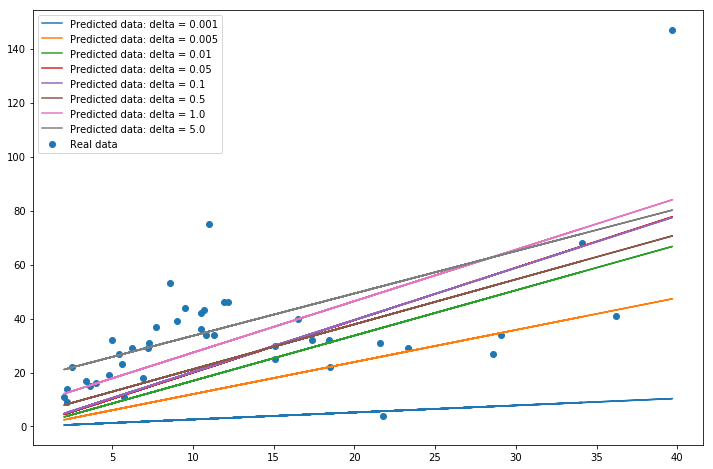

In [278]:
X, Y = data[:, 0], data[:, 1]
plt.figure(figsize=(12, 8))
plt.scatter(X, Y, label="Real data")
for i in range(len(delta)):
    label_delta = "Predicted data: delta = " + str(delta[i])
    plt.plot(Xd, w_n[i] * Xd + b_n[i], label=label_delta)
plt.legend()
plt.show()

